In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv').drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [3]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [4]:
# Current shape of the data 
df.shape

(7352, 562)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Seperate feature and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encoding target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


### Logistic Regression

In [7]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make prediction on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9809653297076818


### Removing Duplicate Features

In [8]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}
    
    for column in df.columns:
        current_column = df[column]
        
        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_strings().encode()
            
        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
    return duplicate_columns

In [9]:
duplicate_columns = get_duplicate_columns(X_train)

In [10]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [11]:
X_train[['tBodyAccMag-mean()', 'tBodyAccMag-sma()','tGravityAccMag-mean()', 'tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [12]:
for one_list in duplicate_columns:
    
    X_train.drop(columns=one_list, inplace=True)
    X_test.drop(columns=one_list, inplace=True)

In [13]:
print(X_train.shape)
print(X_test.shape)

(5881, 542)
(1471, 542)


In [14]:
# After removing duplicate columns
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make prediction on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.982324949014276


### Variance Threshold

In [15]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [16]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [17]:
sum(sel.get_support())

351

In [18]:
columns = X_train.columns[sel.get_support()]

In [19]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=351)

In [20]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [21]:
print(X_train.shape)
print(X_test.shape)

(5881, 351)
(1471, 351)


In [22]:
# After removing duplicate columns
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make prediction on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9809653297076818


### Correlation

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

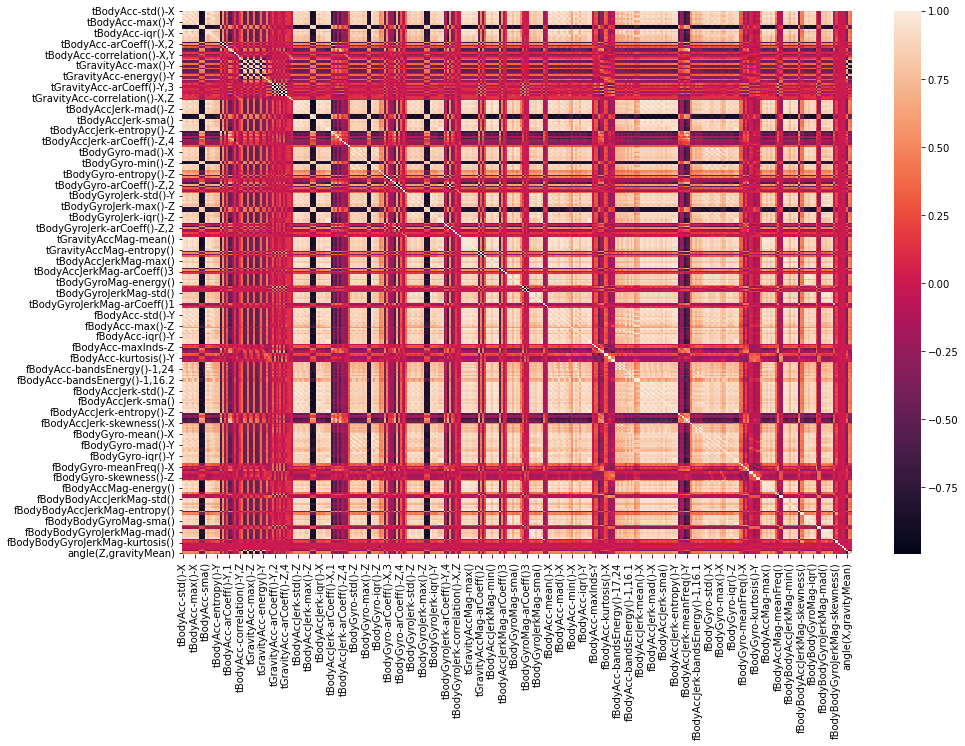

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr())

In [25]:
corr_matrix = X_train.corr()

In [26]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# create an empty list to keep track of columns to drop
columns_to_drop = []

# loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the dataframe
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])
            
print(len(columns_to_drop))

1597


In [27]:
columns_to_drop = set(columns_to_drop)

In [28]:
len(columns_to_drop)

199

In [29]:
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

In [30]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


In [31]:
# After removing duplicate columns
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make prediction on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9714479945615228


### Anova

In [32]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# k will give us the 100 best features according to ANOVA
sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [33]:
columns = X_train.columns[sel.get_support()]

In [34]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [35]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [36]:
# After removing duplicate columns
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make prediction on the test set
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.9700883752549286


### Chi Square 

In [37]:
data = sns.load_dataset('titanic')[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'alive']]
data.head()

,pclass,sex,sibsp,parch,embarked,alive
0,3,male,1,0,S,no
1,1,female,1,0,C,yes
2,3,female,0,0,S,yes
3,1,female,1,0,S,yes
4,3,male,0,0,S,no


In [38]:
data['survived'] = data['alive'].map({'yes':1, 'no':0})
data.drop('alive',axis=1, inplace=True)

In [39]:
# contingency table
ct = pd.crosstab(data['sex'], data['survived'])
ct

survived,0,1
sex,,
female,81,233
male,468,109


In [40]:
# Expected value or ideal table
exp_ct = pd.crosstab(data['sex'], data['survived'], margins=True)
exp_ct

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Expected value formula would be female which would have dies are
$$Female\,0 = \frac{549 \times 314}{891} = 193.47$$
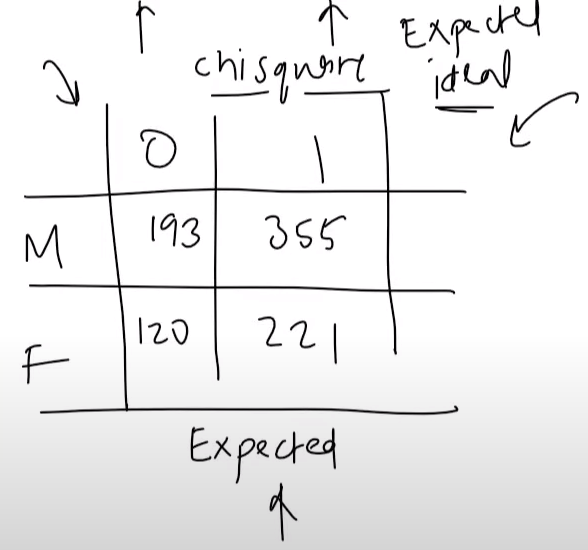

In [41]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

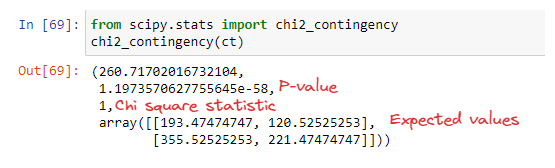
> Small p-value mean very strong or crazy difference between them. The more important the feature is.

In [42]:
score = []

for feature in data.columns[:-1]:
    # create contingency table
    ct = pd.crosstab(data['survived'], data[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<AxesSubplot:>

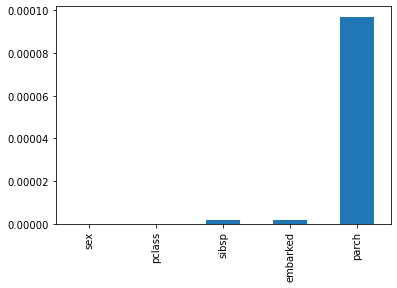

In [43]:
pd.Series(score, index=data.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

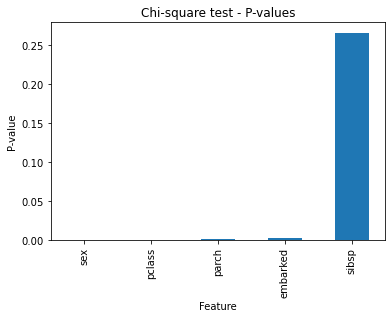

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

X = data_encoded.drop('survived', axis=1)
y = data_encoded['survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()